# Sara Ferrari, Michael Vizelman, Rachel Ward - DAV 6150 - Project 1

## Introduction

In this project, we will be applying the full data science project lifecycle to the implementation of a regression model on a data set consisting of data on more than 12,000 wines to find the best model for the "TARGET" attribute. This information will be used by a large wine producer who is trying to predict the number of wine cases ordered by distributors based on various characteristics of the wine. They will use these predictions to understand ways in which their own wine offerings can be adjusted to maximize wine sales.  

To accomplish this, we will first perform an exploratory data analysis ("EDA") on each of the variables in an effort to discover any data integrity issues (i.e. missing or invalid values), uncover any outliers, and see the distribution of our data. 

Then, based on the results of our EDA, we will perform the necessary data preparation and cleaning in order to prepare the data for use in a machine learning model. This work will be guided by our domain knowledge and our EDA, and will be explained further in that section. We will again perform an EDA on our transformed data, in order to see the effects of our transformations on the data. We will compare the results of our transformed data to those of the original data and discuss how our transformations will lead to a better machine learning model.

After the data preparation we will perform feature selection and/or dimensionality reduction using a variety of methods that will be discussed further in that section. 

Then we will create different regression models, including multiple linear regression, poisson regression, and negative binomial regression to our explanatory variables to see which model best predicts the "TARGET" attribute.

Lastly, we will choose the best model and fit this model with previously unseen data from an evaluation dataset to see how our model performs on this new data. 

## Data Profiling & Domain Knowledge Development

**Index** - This is a unique ID for each wine in the dataset.

**Target** - This represents the response variable, which is number of cases sold.

**Fixed Acidity** - The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.  
Their respective levels found in wine can vary greatly but in general one would expect to see according to [this link](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity):
- 1 to 4 g/L tartaric acid
- 0 to 8 g/L malic acid
- 0 to 0.5 g/L citric acid
- 0.5 to 2 g/L succinic acid
- 1.5 to 14.5 g/L when added up

**Volatile Acidity** - A measure of the wine's volatile (or gaseous) acids.  
The primary volatile acid in wine is acetic acid, which is also the primary acid associated with the smell and taste of vinegar.  
Volatile acidity concentration is regulated by the federal Tax and Trade Bureau, the maximum volatile acidity according to [this link](https://extension.psu.edu/volatile-acidity-in-wine#:~:text=Volatile%20acidity%20(VA)%20is%20a%20measure%20of%20the%20wine's%20volatile,smell%20and%20taste%20of%20vinegar.) is:
- 1.4 g/L for red wine 
- 1.2 g/L for white wine

**Citric Acid** - A weak organic acid that occurs naturally in citrus fruits. Part of the acids that compile Fixed Acidity in wine.  

**Residual Sugar** - According to [this link](http://www.moundtop.com/pdf/Winemaking-ResidualSugar.pdf),the Residual Sugar value in wine can vary from 1-2g/L up to 100-200g/L depending on the type of wine. 

**Chlorides** - According to [this link](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0101-20612015000100095#:~:text=Wine%20contains%20from%202%20to,2003%3B%20Maltman%2C%202013), chlorides are a major contributor to saltiness, and wine contains from 2 to 4 g/L of salts of mineral acids, along with some organic acids, and they have a key role on a potential salty taste of a wine.  

**Free Sulfur Dioxide** - The Free Sulfur Dioxide (FSO2) and the pH of a wine determine how much SO2 is available in the active, molecular form to help protect the wine from oxidation and spoilage.

**Total Sulfur Dioxide** - Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars. The TSO2 level is also regulated by the U.S. Alcohol and Tobacco Tax and Trade Bureau (TTB).   
The maximum allowable concentration for a bottled wine according to [this link](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too) is: 350 ppm (mg/L) of TSO2.

**Density** - We know the density of water is about 1.000 g/mL so we can assume wine density should be around that value. [This link](https://chemwine.com/home/why-is-wine-density-important-1-sl6yl/) provides a formula to estimate a wine’s density.

**pH** - According to [this link](https://daily.sevenfifty.com/how-winemakers-analyze-ph-and-its-impact-on-wine/) pH levels in wine wine are generally between 3 and 4, with some wines reaching slightly beyond that, to high 2s or low 4s.   
For each full point increase in pH, the level of acidity is 10 times more acidic as you go up, so the difference between a pH of 3 and a pH of 4 is very significant.

**Sulphates** - According to [this link](http://blog.lastbottlewines.com/education/sulphites/), the level of Sulfites in wine can vary from 0.15g/L up to 0.3g/L depending on the type of wine. (Note: Our research did not yield any results for the spelling sulphates, so we inferred that this variable refers to sulfites.) 

**Alcohol** - Non-Alcoholic wine exists and Alcohol content in wine ranges wildly from as low as 5.5% to 23% ABV.     
[This link](https://winefolly.com/tips/the-lightest-to-the-strongest-wine/) provides more detailed information regarding different types of wine and their Alcohol content. 

**Label Appeal** - The description we were given for this field was "subjective marketing score that indicates the appeal of the design of the label on the bottle."

**Acid Index** - Acording to [this link](http://www.bcawa.ca/winemaking/acidph.htm), acid index is calculated by subtracting the pH from the Total Acidity (TA). This is differnt than the desription provided with the dataset ("Measures total acidity of wine via a weighted average").  

**STARS** - The description we were given for this field was "wine rating as determined by experts (4 = excellent; 1 = Poor)."

## Exploratory Data Analysis

First we will read the data into python using pandas read csv function. Then we will look for missing and/or invalid data values and perform an exploratory data analysis on our dataset to determine what data need to be prepared for a future machine learning model. 

In [1]:
#first import the necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#next read in the file
filename = 'https://raw.githubusercontent.com/rachelward617/DAV-6150/master/M3_Data.csv'
wine = pd.read_csv(filename)

#check results
wine.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [2]:
#change Sulphates to Sulfites
wine.rename(columns = {'Sulphates':'Sulfites'}, inplace = True) 

In [3]:
# check the dataset for null values
wine.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulfites              1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

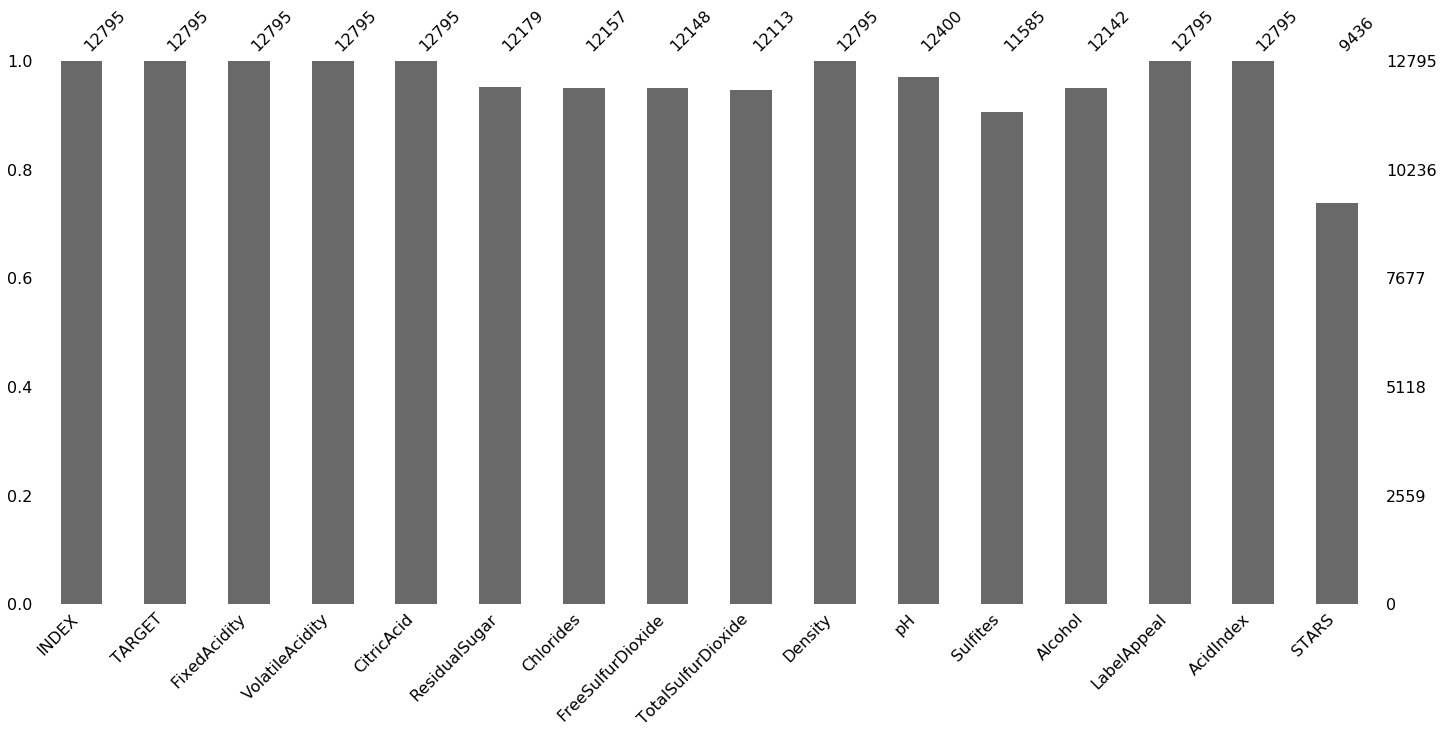

In [4]:
#first import missingno after pip install
import missingno as msno

#visualize the amount of missing data using missingno's bar chart
msno.bar(wine);

We see that the variables Residual Sugar, Chlorides, Free Sulfure Dioxide, Total Sulfur Dioxide, pH, Sulphates, Alcohol, and Stars all have missing values, with STARS having the most missing values of all variables.

More than 26% (3,359 out of 12,795) of STARS values are missing. Based on domain knowledge + common sense, a potentially plausible explanation for why so many wines lack a STARS value would be that not all wines get rated  by experts and these wines were not worthy enough to be considered for rating by experts (not expensive enough or not from a worthy winery). Since the values in the STARS column are ordinal, it would be reasonable to assign the value '0' to those wines, which we will do later on. 

In [5]:
#get summary statistics for each variable, including mean, standard deviation, median, quartiles, and range
wine.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulfites,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


We see from above that the range of fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol, and label appeal contain negative values. From our domain knowledge and research, we know that, with the exception of label appeal, there should not be negative values for these attributes.

Now we will investigate further to see if the locations of the missing data are correlated by using missingno library's heatmap function. This investigation will help us determine how to treat missing values in our data preparation phase. 

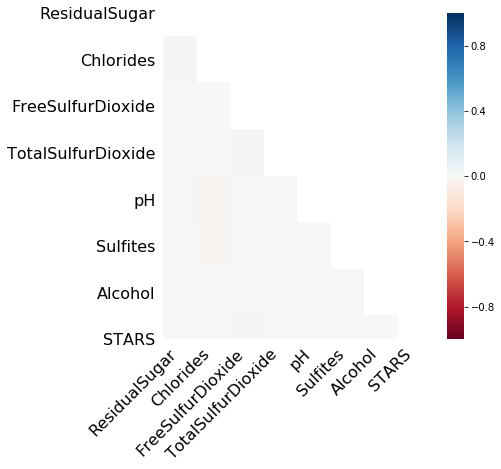

In [6]:
#graph a heat map of the missing data to see if the locations where the data are missing are correlated.
#code as referenced in O'Reilley's Machine Learning Pocket Reference
ax = msno.heatmap(wine, figsize = (6,6))
ax.get_figure(); #add a ; at the end to prevent it from displaying twice

Based on the heat map above, there does not appear to be a correlation between the location of the missing data for the variables. Next we will look at a matrix to see if there is a pattern to the missing data.

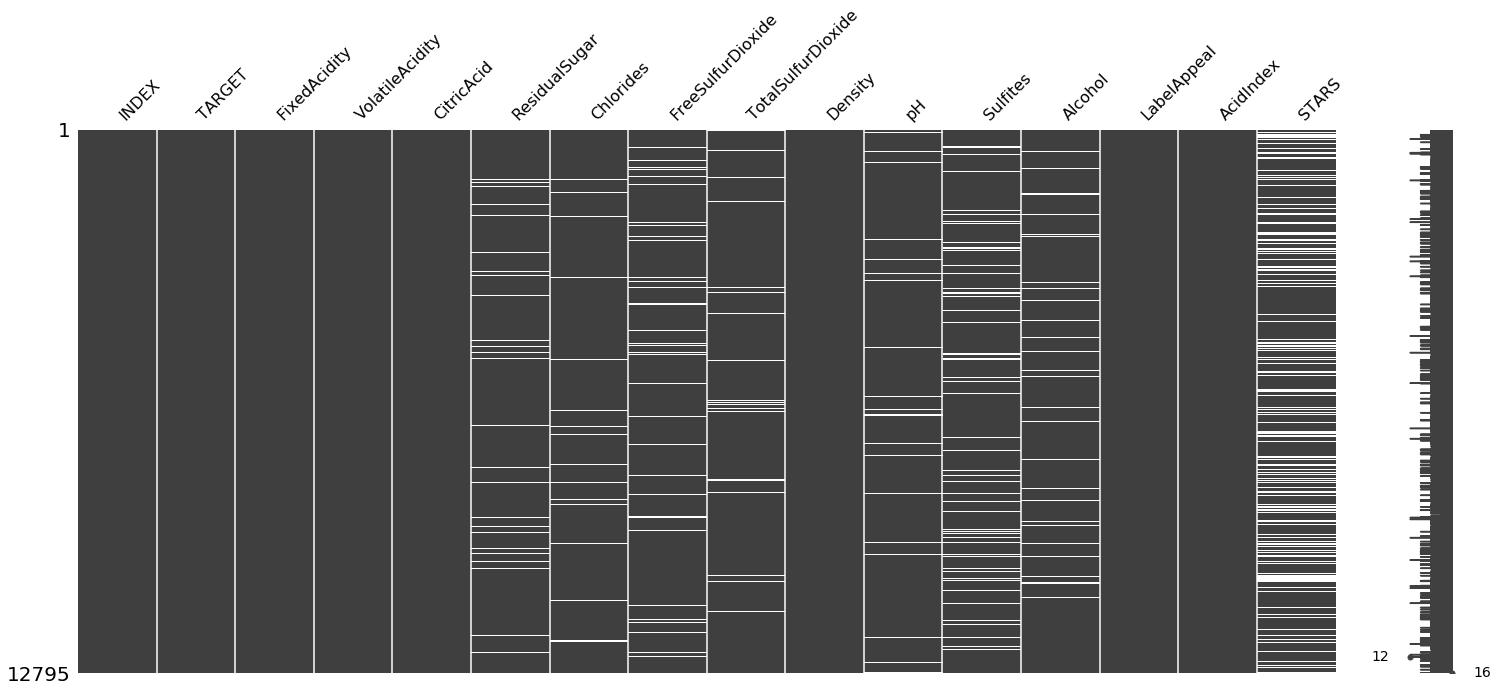

In [7]:
#use missingnos matrix to see if there is a pattern to the missing data
ax2 = msno.matrix(wine)
ax2.get_figure();

Based on the matrix, it does not appear that there is a pattern to the missing data, which indicates our data is missing at random.

Next we will look at the distributions of our data to identify the shape of the distribution as well as identify any potential outliers.

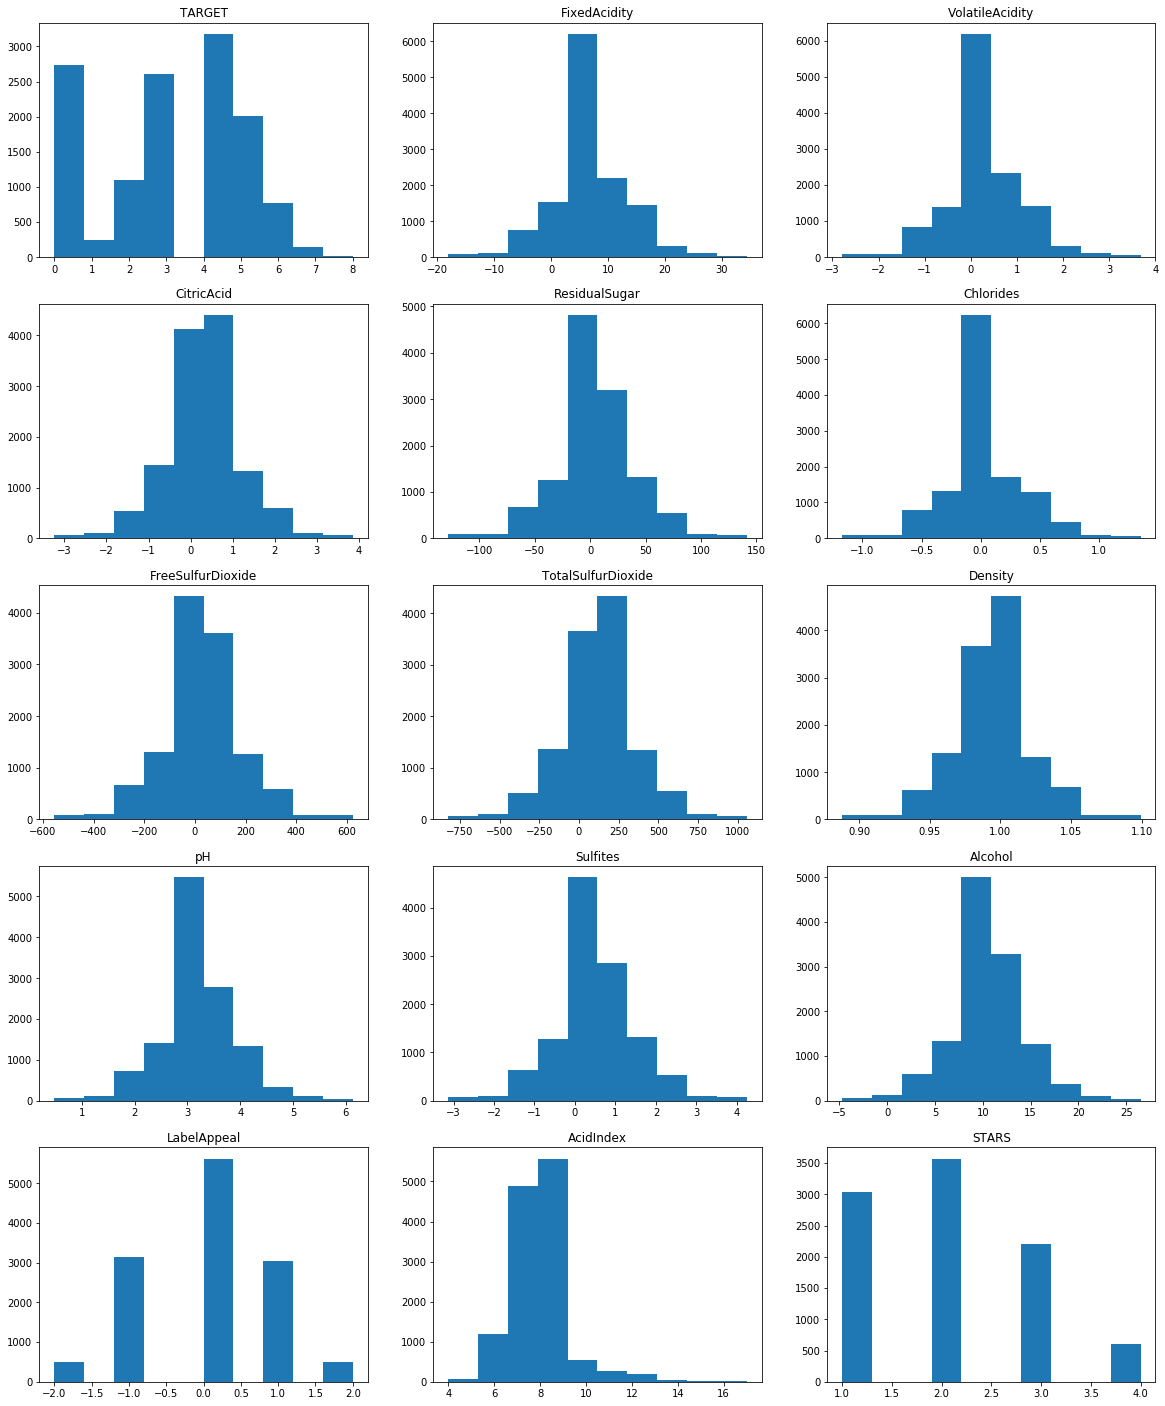

In [8]:
#define a figure to which we will add a histogram for each of our attributes, except for index
plt.figure(figsize=(20,25))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
columns=wine.columns.tolist()
for k in columns[1:] :   #for each column in the dataframe graph a histogram 
    plt.subplot(5,3,j) 
    plt.hist(wine[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

From the above histograms, which ignore missing values, we see that the majority of our attributes are approximately normally distributed, with the exception of the response variable (target), acid index, and stars. 

Next we will look at boxplots of our data to see if there are any outliers.

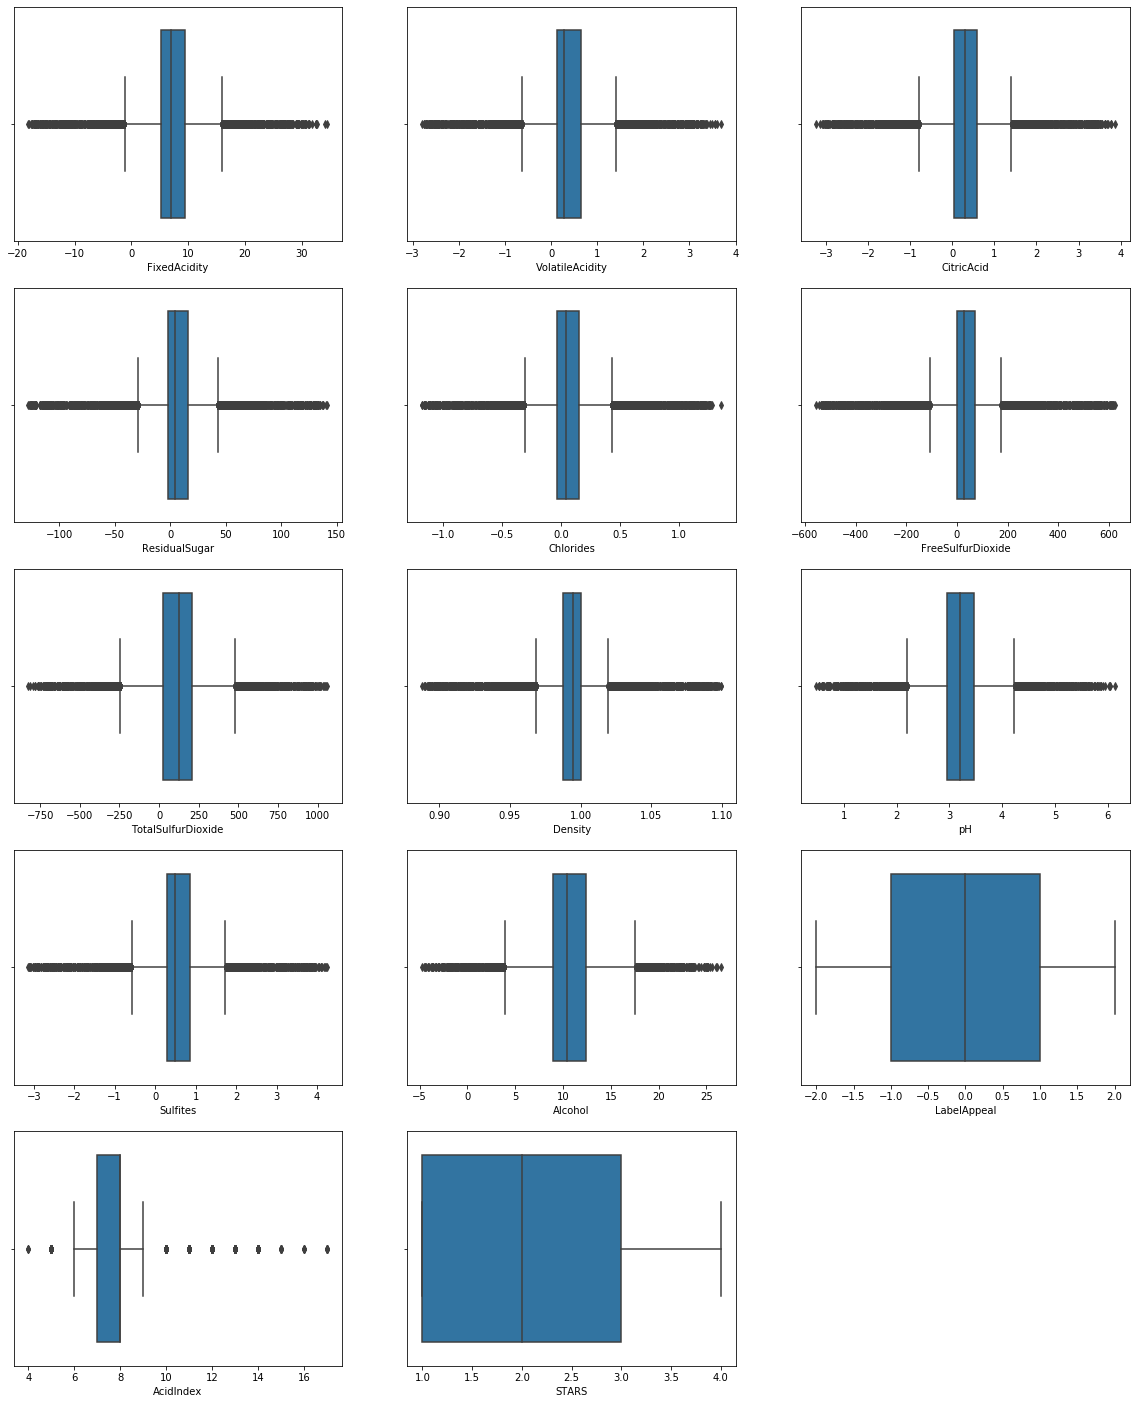

In [9]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=wine.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe except INDEX and TARGET
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=wine)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show()

From the above boxplots we see that most of our attributes have numerous outliers. We will discuss further below how we will deal with these outliers.

We will also check a correlation matrix between the variables before any transformation to see if our transformations have any effect on the correlation.

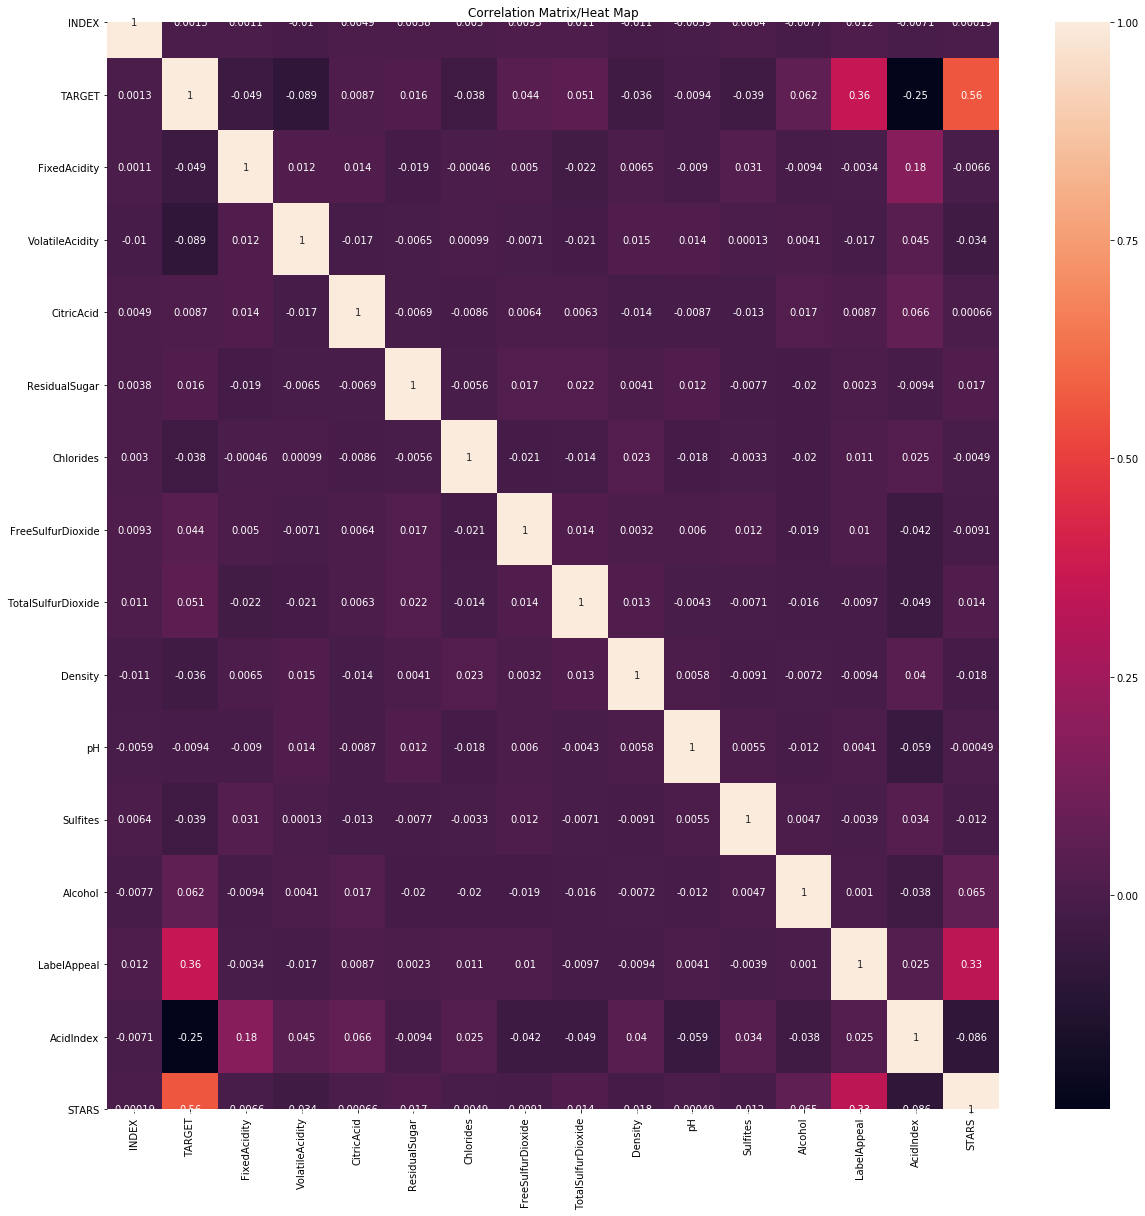

In [10]:
#next get correlation matrix and plot it using seaborn
plt.figure(figsize=(20, 20)) #set figure size
corrMatrix = wine.corr() #get correlation matrix
sns.heatmap(corrMatrix, annot=True) #graph correlation matrix
plt.title('Correlation Matrix/Heat Map') 
plt.show()

We see from our correlation matrix that none of our attributes have a particularly strong correlation. The strongest correlation of 0.56 is between our target attribute and the stars attribute.

Next, we will look at the amount of invalid negative values in nine variables representing various chemical composition measures within wines (Chlorides, ResidualSugar, FreeSulfurDioxide, CitricAcid, VolatileAcidity, TotalSulfurDioxide, Sulfites, FixedAcidity and Alcohol). 

In [11]:
#look at proportion of invalid negative values in the datset

wine_neg = wine[['Chlorides', 'ResidualSugar', 'FreeSulfurDioxide', 'CitricAcid', 'VolatileAcidity', 'TotalSulfurDioxide', 'Sulfites', 'FixedAcidity', 'Alcohol']]

count_neg=[]
count=0
for col in wine_neg.columns:
    for i in range(len(wine_neg)):
        if wine_neg[col][i] < 0:
            count+=1
    count_neg.append(count)
    count=0
neg_num_df = pd.DataFrame()
neg_num_df['Column'] = ['Chlorides', 'ResidualSugar', 'FreeSulfurDioxide', 'CitricAcid', 'VolatileAcidity', 'TotalSulfurDioxide', 'Sulfites', 'FixedAcidity', 'Alcohol']
neg_num_df['# Negative'] = pd.DataFrame({'# Negative': count_neg})
neg_num_df['% of Total'] = round((neg_num_df['# Negative']/len(wine_neg)),4)*100
neg_num_df

,Column,# Negative,% of Total
0,Chlorides,3197,24.99
1,ResidualSugar,3136,24.51
2,FreeSulfurDioxide,3036,23.73
3,CitricAcid,2966,23.18
4,VolatileAcidity,2827,22.09
5,TotalSulfurDioxide,2504,19.57
6,Sulfites,2361,18.45
7,FixedAcidity,1621,12.67
8,Alcohol,118,0.92


Because there are so many invalid values, as well as so many missing values, we lay out below our approach to handling this situation. We take the absolute value of the negative values, so that we will not be discarding so much of the original data set. We then perform another EDA to see how our adjustments have affected the data set.

## Data Preparation and EDA Review - Substitute the negative values with their absolute value

Our idea to handle the missing values and negative values is to substitute the negative values with their absolute value. We feel this approach is appropriate as the absolute value of the data are still within the normal range. However, we recognize that this is a large assumption, and we would prefer to understand how this data was collected and entered to properly determine how to account for these data integrity issues.

In [12]:
#first copy the original data set so that we can perform transformations
absolute=wine.copy()

#perform transformation on label appeal as so that we do not have any negative values but do not change the distribution
absolute['LabelAppeal']=wine['LabelAppeal']+2

#get the absolute values of the new data frame to get rid of the negative values
absolute=absolute.abs().copy()

#check results
absolute.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulfites,Alcohol,LabelAppeal,AcidIndex,STARS
0,1.0,3.0,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,2.0,8.0,2.0
1,2.0,3.0,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,1.0,7.0,3.0
2,4.0,5.0,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,1.0,8.0,3.0
3,5.0,3.0,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,1.0,6.0,1.0
4,6.0,4.0,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,2.0,9.0,2.0


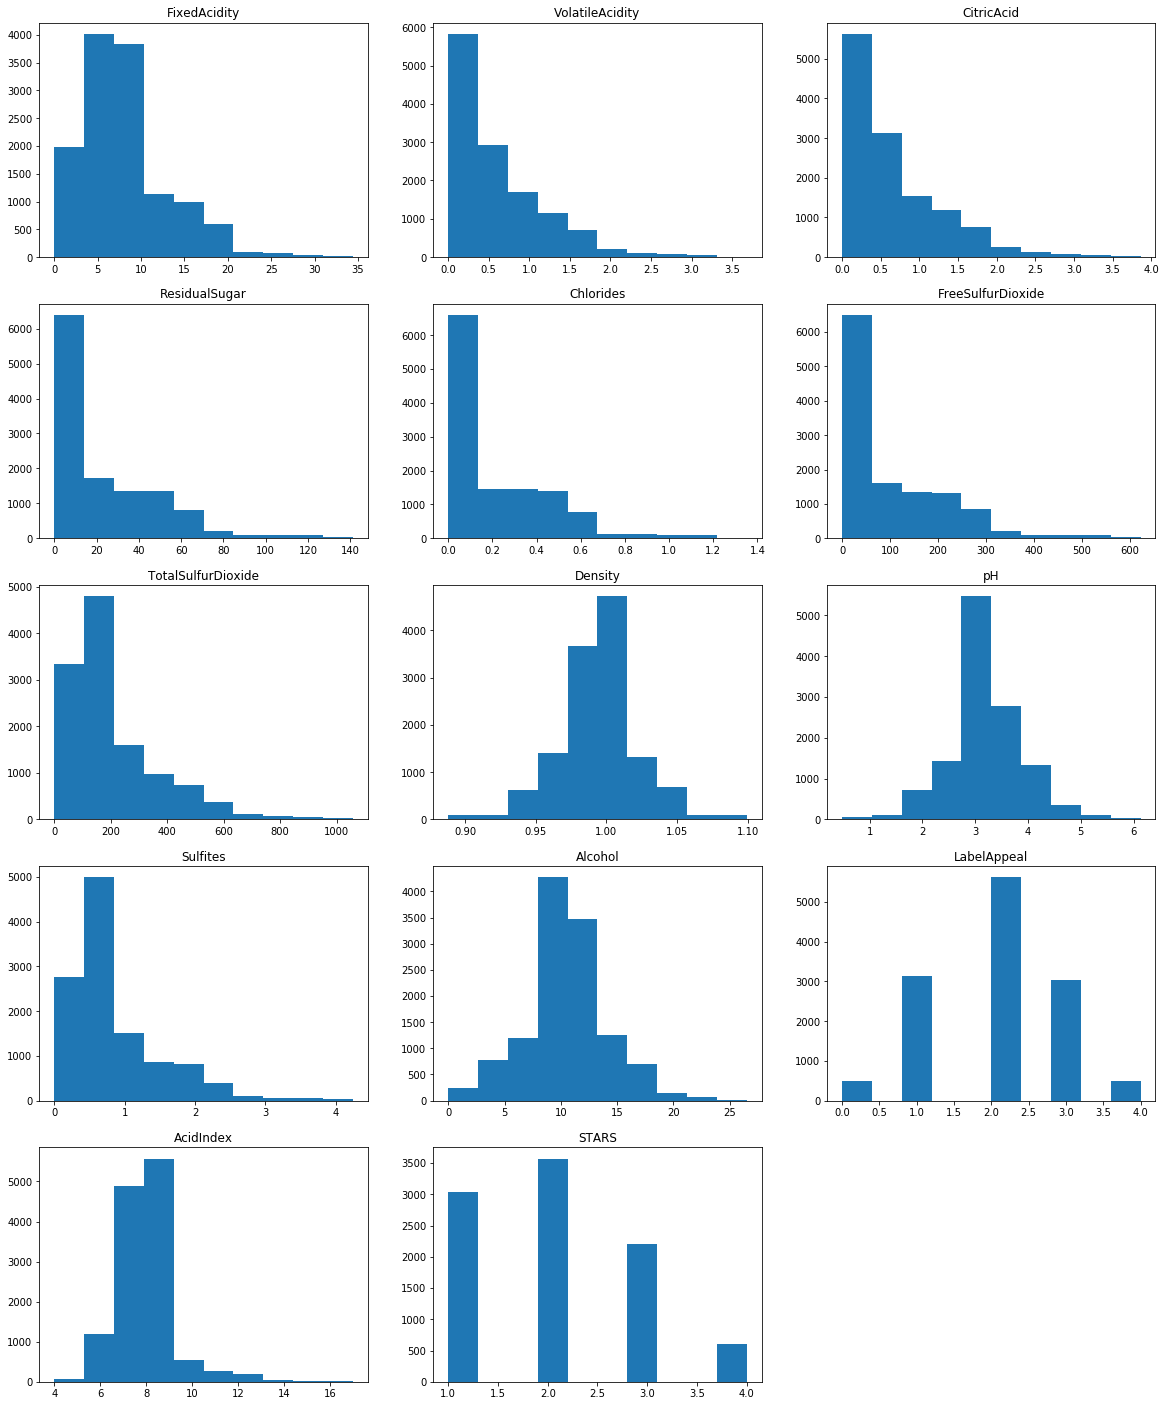

In [13]:
#next check distributions
#define figure to which we will add the histograms of each variable
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=absolute.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe except INDEX and TARGET
    plt.subplot(5,3,j) 
    plt.hist(absolute[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

We see that our transformation to absolute values has made many of the orginal normally distributed variables right skewed. Next we will check the boxplots to see if there are any outliers.

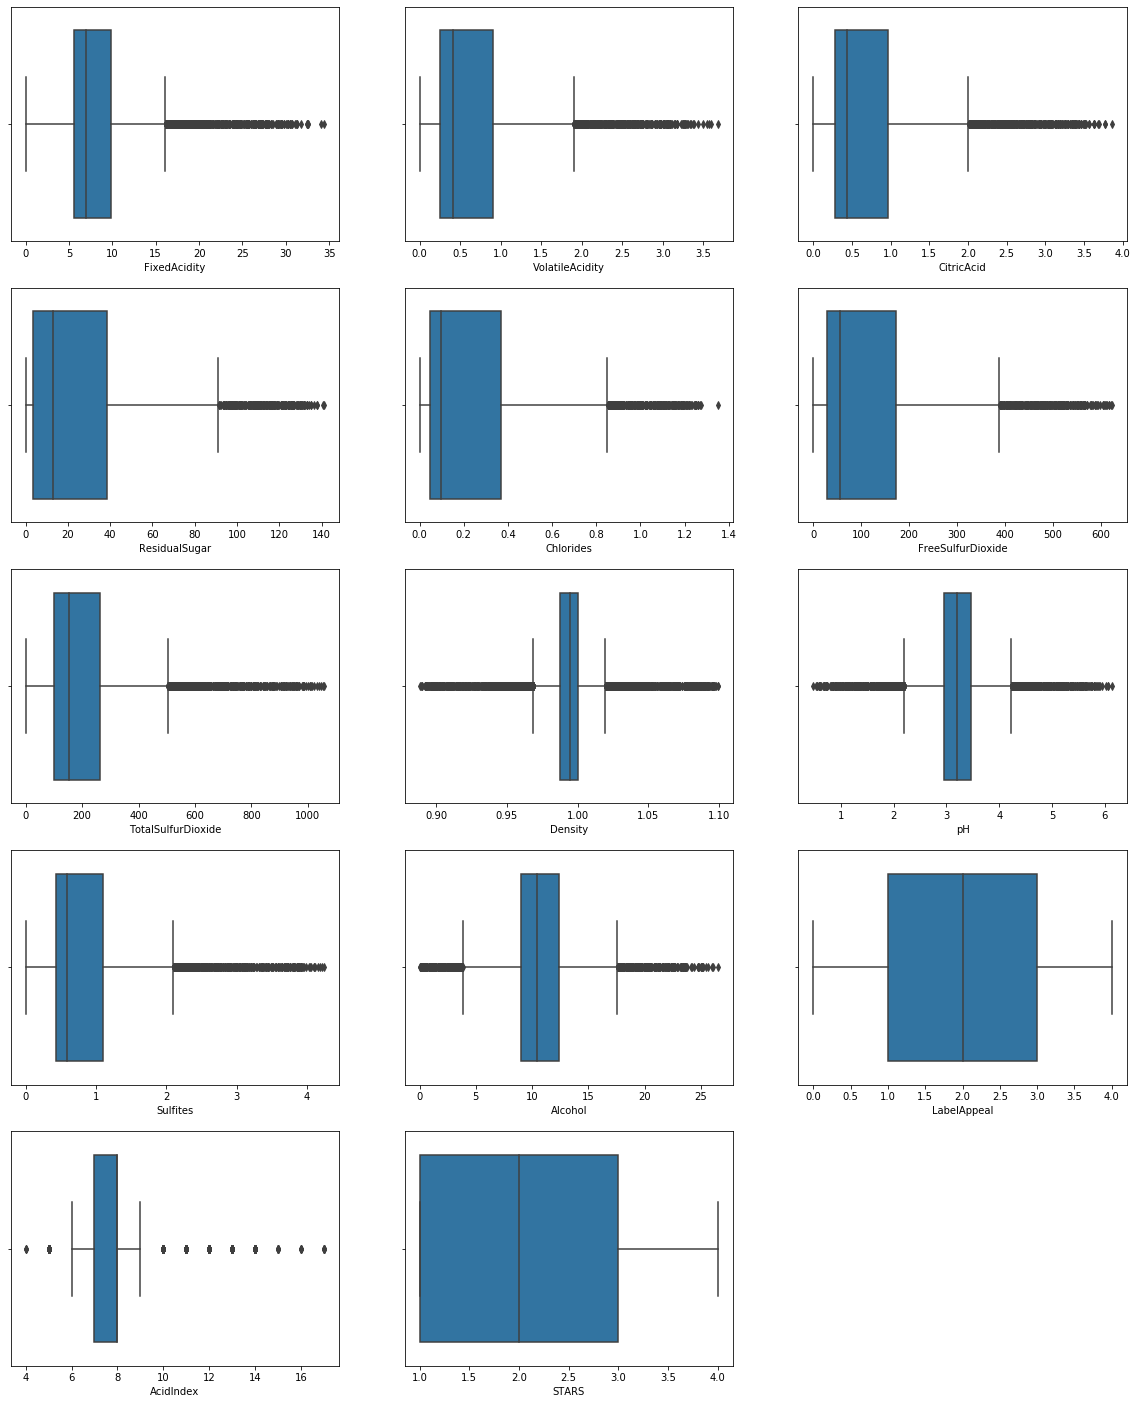

In [14]:
#graph the boxplots. Define the figure to which we will append our boxplots
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subuplot
j=1
columns=absolute.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe except INDEX and TARGET
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=absolute)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

We see there are outliers which we will address below. We will now eliminate invalid data using our domain knowledge.

In [15]:
#copy the data frame 
absolute_legal=absolute.copy()

#remove rows that have a volatile acidity above 1.4
absolute_legal=absolute_legal[absolute_legal.VolatileAcidity<=1.4]

#remove rows that have a total sulfur dioxide value above 350
absolute_legal=absolute_legal[(absolute_legal.TotalSulfurDioxide<=350)
                              | (absolute_legal.TotalSulfurDioxide.isnull())]

#remove rows that have a free sulfur dioxide value above 350
absolute_legal=absolute_legal[(absolute_legal.FreeSulfurDioxide<=350) 
                              | (absolute_legal.FreeSulfurDioxide.isnull())]

#remove rows where the free sulfur dioxide value is greater than the total sulfur dioxide value
absolute_legal=absolute_legal[(absolute_legal.FreeSulfurDioxide<=absolute_legal.TotalSulfurDioxide) 
                              | (absolute_legal.FreeSulfurDioxide.isnull()) 
                              |(absolute_legal.TotalSulfurDioxide.isnull())]

#remove rows that have a pH value of less than 2 or greater than 5.
absolute_legal=absolute_legal[((absolute_legal.pH >2) & (absolute_legal.pH<5))
                              | (absolute_legal.pH.isnull())]

#check shape
absolute_legal.shape

(6511, 16)

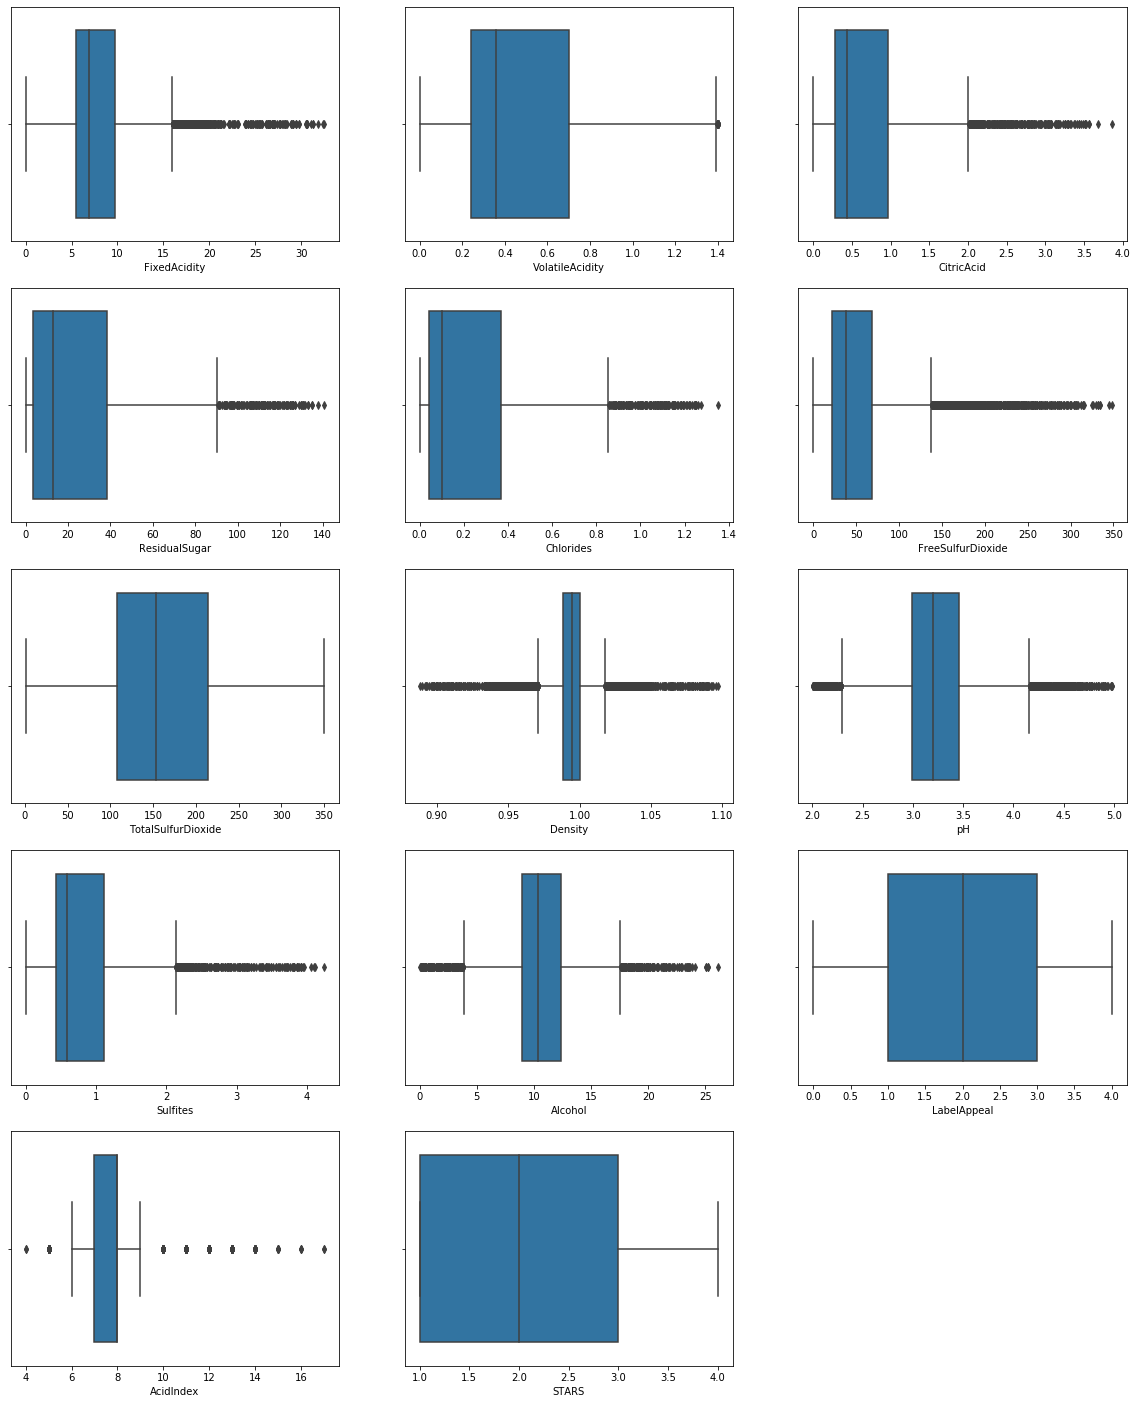

In [16]:
#graph the boxplots. Define the figure to which we will append our boxplots
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subuplot
j=1
columns=absolute_legal.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=absolute_legal)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

The elimination of invalid data has led to some of the previously normally distributed variables becoming right skewed. This was expected as we transformed the negative values into absolute values, we would expect the center of the distribution as well as the skew of the distribution to change. Further, we are comfortable with these distributions being skewed based on our domain knowledge.

Next we will check for null values in our transformed dataset.

In [17]:
#check for null values
absolute_legal.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          310
Chlorides              351
FreeSulfurDioxide      459
TotalSulfurDioxide     566
Density                  0
pH                     206
Sulfites               627
Alcohol                337
LabelAppeal              0
AcidIndex                0
STARS                 1668
dtype: int64

Next, we will assign the value '0' in the STARS column to wines that are missing a STARS rating as a new category in the STARS column, the reasoning for which we explained earlier. 

In [18]:
#create a new data frame without the index and target columns
absolute_input=absolute_legal.iloc[:,2:].copy()

#replace the null values in STARS with 0 as that will create a new category
absolute_input['STARS']=absolute_input.STARS.replace(np.nan, 0)

#check results
absolute_input.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulfites,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.2,1.160,0.98,54.20,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,2.0,8.0,2.0
1,4.5,0.160,0.81,26.10,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,1.0,7.0,3.0
3,5.7,0.385,0.04,18.80,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,1.0,6.0,1.0
8,14.8,0.270,1.05,11.25,0.007,213.0,NaN,0.99620,4.93,0.26,15.0,2.0,6.0,0.0
9,5.5,0.220,0.39,1.80,0.277,62.0,180.0,0.94724,3.09,0.75,12.6,2.0,8.0,4.0


Next we will impute the missing values in all the other columns using Scikit-Learn's K-Nearest-Neighbors function (KNN). We chose to use a k value of 81 as it is the square root of the sample size (6511). Since we have numerous different data types, KNN is a good choice. 

In [19]:
#import module
from sklearn.impute import KNNImputer
#impute the values using K value of 81
imputer = KNNImputer(n_neighbors=81, weights="uniform")

#take the array results and transform into a dataframe
#we will use only the first 14 input variables
absolute_input_knn=pd.DataFrame(imputer.fit_transform(absolute_input)
                                ,columns=absolute_input.columns.tolist())
#show results
absolute_input_knn.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulfites,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.2,1.160,0.98,54.20,0.567,91.666667,268.000000,0.99280,3.33,0.59,9.900000,2.0,8.0,2.0
1,4.5,0.160,0.81,26.10,0.425,15.000000,327.000000,1.02792,3.38,0.70,10.368519,1.0,7.0,3.0
2,5.7,0.385,0.04,18.80,0.425,22.000000,115.000000,0.99640,2.24,1.83,6.200000,1.0,6.0,1.0
3,14.8,0.270,1.05,11.25,0.007,213.000000,165.944444,0.99620,4.93,0.26,15.000000,2.0,6.0,0.0
4,5.5,0.220,0.39,1.80,0.277,62.000000,180.000000,0.94724,3.09,0.75,12.600000,2.0,8.0,4.0


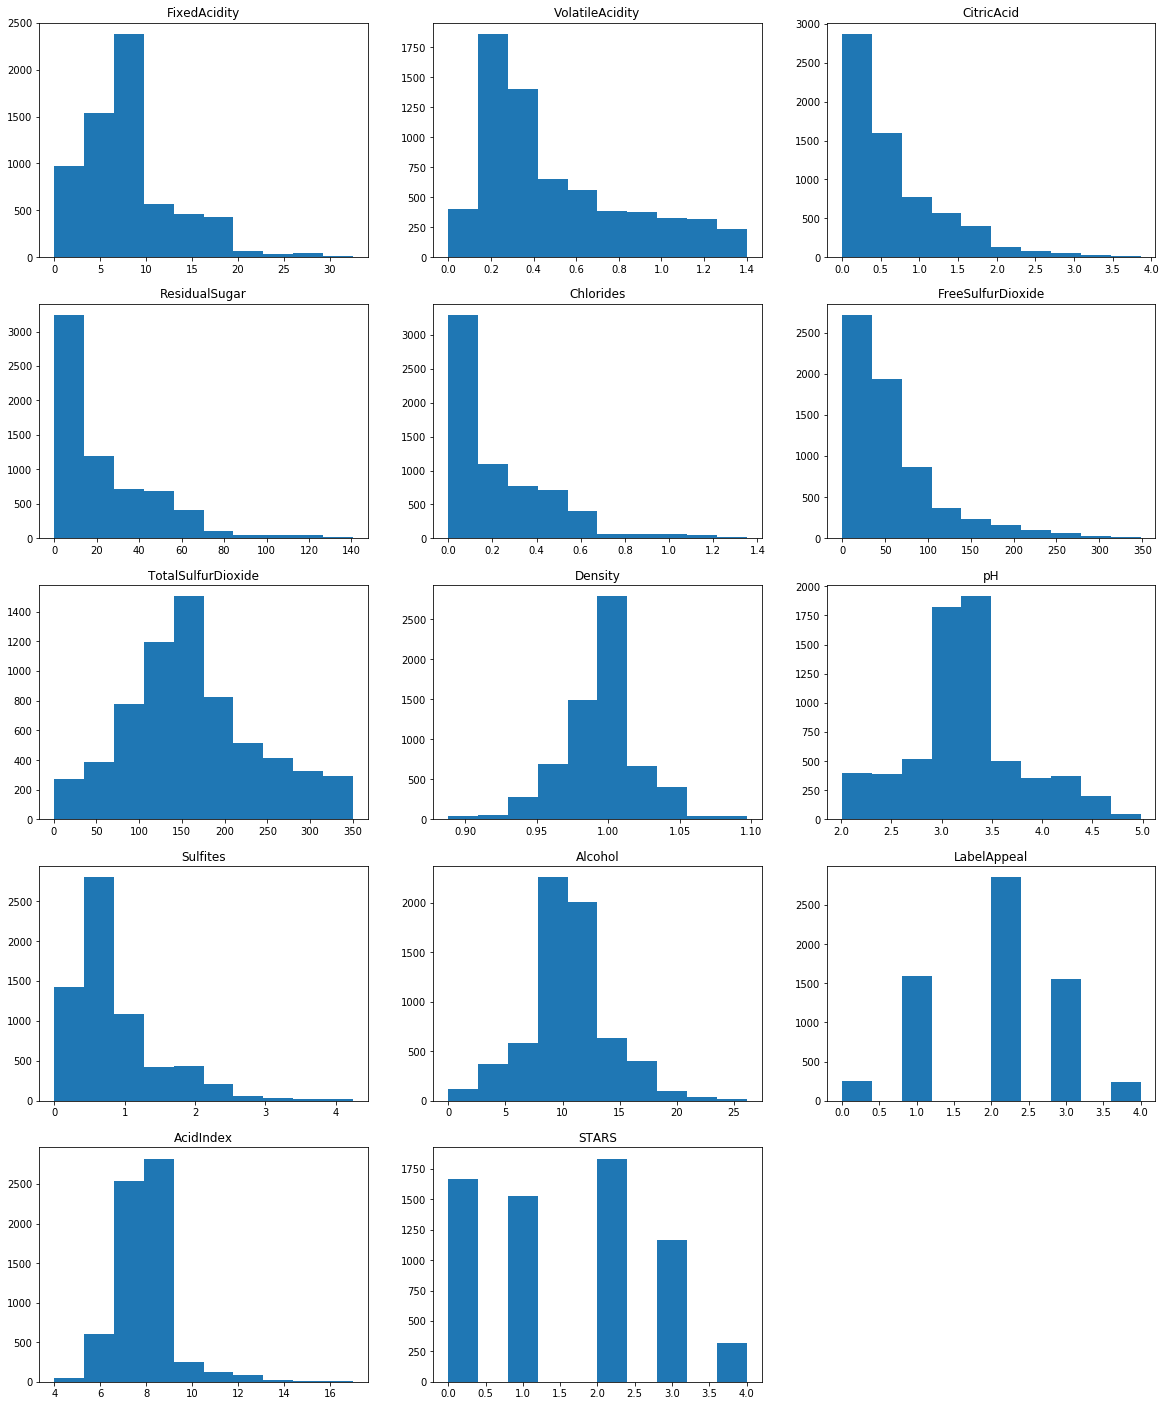

In [20]:
#next check the distributions of the imputed variables
#define figure to which we will add the histograms of each variable
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=absolute_input_knn.columns.tolist()
for k in columns:   #for each column in the dataframe
    plt.subplot(5,3,j) 
    plt.hist(absolute_input_knn[k]);
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space
#show results   
plt.show()

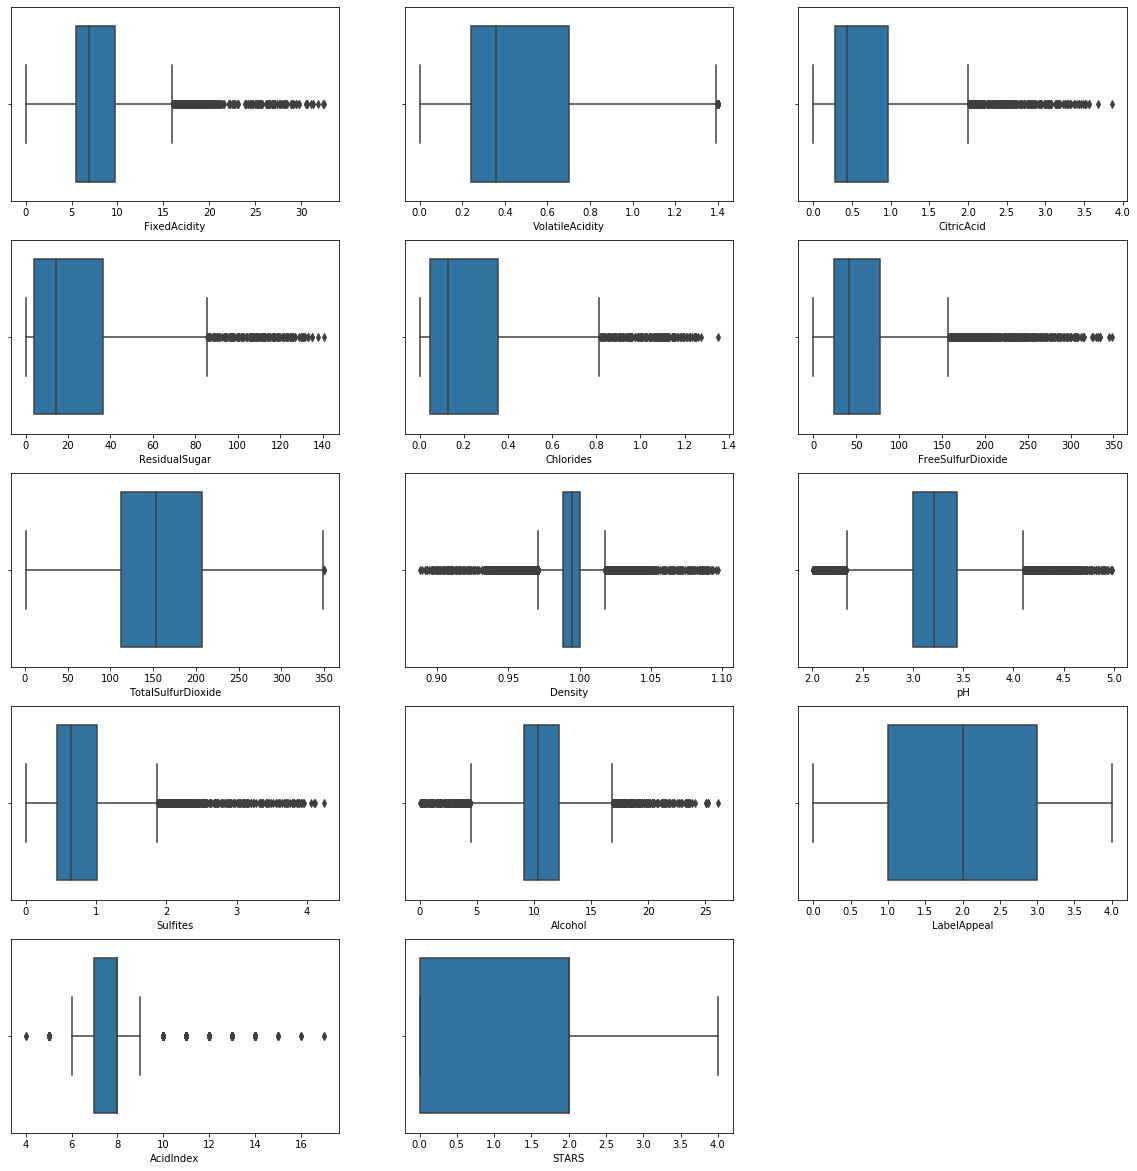

In [21]:
#graph the boxplots. Define the figure to which we will append our boxplots
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=absolute_input_knn.columns.tolist()
for k in columns:   #for each column in the dataframe
    plt.subplot(6,3,j) 
    sns.boxplot(x=k,data=absolute_input_knn)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

In [22]:
#check for number of outliers per column
columns=absolute_input_knn.columns.tolist()
new_df=absolute_input_knn.copy()
print('Current Shape:',absolute_input_knn.shape)
for k in columns:
    IQ3=new_df[k].quantile(0.75)
    IQ1=new_df[k].quantile(0.25)
    IQR=(IQ3-IQ1)*1.5
    print('Number of outliers for variable %s:' %k, new_df.shape[0]-new_df[((new_df[k]>=(IQ1-IQR)) & (new_df[k]<=(IQ3+IQR))) | (new_df[k].isnull())].shape[0])

Current Shape: (6511, 14)
Number of outliers for variable FixedAcidity: 620
Number of outliers for variable VolatileAcidity: 17
Number of outliers for variable CitricAcid: 251
Number of outliers for variable ResidualSugar: 152
Number of outliers for variable Chlorides: 176
Number of outliers for variable FreeSulfurDioxide: 482
Number of outliers for variable TotalSulfurDioxide: 4
Number of outliers for variable Density: 2074
Number of outliers for variable pH: 1019
Number of outliers for variable Sulfites: 582
Number of outliers for variable Alcohol: 649
Number of outliers for variable LabelAppeal: 0
Number of outliers for variable AcidIndex: 539
Number of outliers for variable STARS: 0


Our distributions after imputation are very similar to our distributions after we took the absolute value of the negative data points. It seems that the imputation did not change the pdf of the variables.

Although there appear to be outliers, we decided not to remove any of them. We previously eliminated rows where we knew there were invalid data points (for example, free sulfur dioxide, total sulfur dioxide). These outliers could just be a result of having truncated the dataset. 

Further, we have already significantly reduced the size of the dataset from close to 12,700 to now 6,511 rows. If we were to eliminate further data, we would prefer to speak to a subject matter expert. This method is a conservative way to have enough data on which to build models.

Next we re-insert the target variable and index into the dataset. 

In [23]:
#create a dataset that is ready to be used for a model
#we don't need to use any index to join the datasets because the order of the rows was maintained throughout our transformations
target=absolute_legal.iloc[:,:2].reset_index(drop=True).copy() #INDEX and TARGET variables
explanatory=absolute_input_knn.reset_index(drop=True).copy() #imputed columns
absolute_output_df=pd.concat([target,explanatory],axis=1)

#check results
absolute_output_df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulfites,Alcohol,LabelAppeal,AcidIndex,STARS
0,1.0,3.0,3.2,1.160,0.98,54.20,0.567,91.666667,268.000000,0.99280,3.33,0.59,9.900000,2.0,8.0,2.0
1,2.0,3.0,4.5,0.160,0.81,26.10,0.425,15.000000,327.000000,1.02792,3.38,0.70,10.368519,1.0,7.0,3.0
2,5.0,3.0,5.7,0.385,0.04,18.80,0.425,22.000000,115.000000,0.99640,2.24,1.83,6.200000,1.0,6.0,1.0
3,12.0,3.0,14.8,0.270,1.05,11.25,0.007,213.000000,165.944444,0.99620,4.93,0.26,15.000000,2.0,6.0,0.0
4,13.0,6.0,5.5,0.220,0.39,1.80,0.277,62.000000,180.000000,0.94724,3.09,0.75,12.600000,2.0,8.0,4.0


Next we will verify that there are no null values in this new dataframe.

In [24]:
#double check that there are no null values in these new columns
absolute_output_df.isnull().sum()

INDEX                 0
TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulfites              0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64

There are no missing values in our dataset.

## Feature Selection

We will now examine the correlation matrix to identify possible relationships between the target variable and the explanatory variables. Since our target variable is a count variable, we will not use scatterplots as they would not be meaningful. 

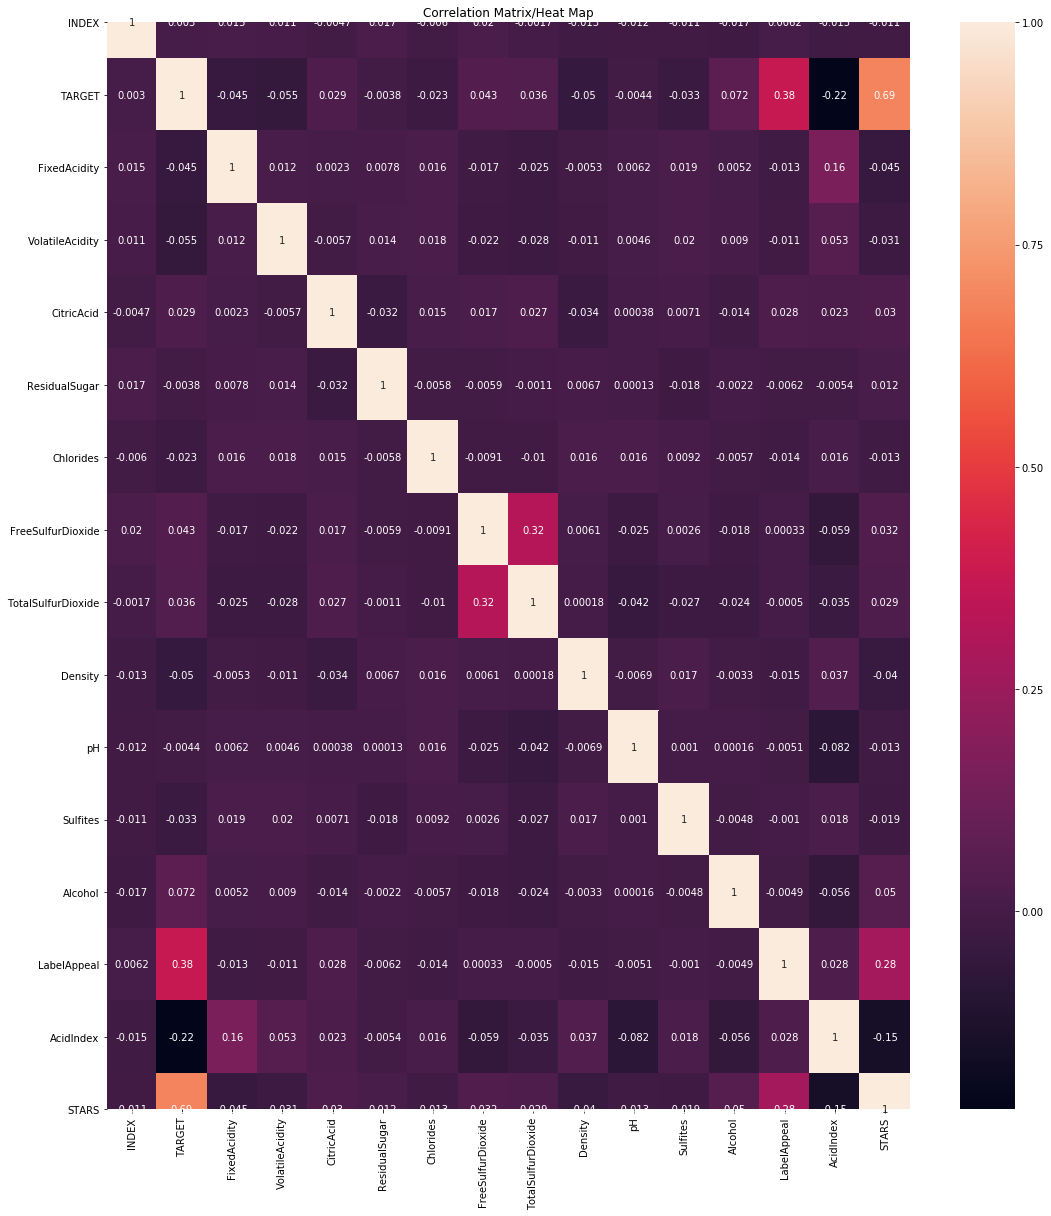

In [25]:
#next get correlation matrix and plot it using seaborn
plt.figure(figsize=(18,20))#set figure size
corrMatrix = absolute_output_df.corr() #get correlation matrix
sns.heatmap(corrMatrix, annot=True) #graph correlation matrix
plt.title('Correlation Matrix/Heat Map') 
plt.show()

STARS, AcidIndex, and LabelAppeal appear to be the variables most correlated with the target variable.

## Regression Modeling

Now that we have our data prepared, we will begin building regression models to see which type of model as well as which features yield the best results.  
We will begin with building multiple linear regression models.

## Multiple Linear Regression Models

Even though, for the nature of our TARGET variable, a multiple linear regression model is not the best fit, we want to use it as a first step to introduce the variables and their significance in respect to the TARGET.

We will create two multiple linear regression models.  
- The first model will use the following predictor variables: STARS, AcidIndex, and LabelAppeal. By looking at the correlation matrix these varaibles are the ones most correlated with the target variable.
- The second model will use predictor variables which will be chosen automatically by bidirectional selection. We will compare the chosen variables to those we used for our first model, to see whether our approach is supported and see which other variables are useful in a linear regression model with this dataset.

### Model 1 - Using Selected Features

For our first multiple regression model we will utilize the variables which had the highest correlation with the target variable(STARS, AcidIndex, and LabelAppeal) as features to predict our target variable.  

In [26]:
# import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# create a model with the variables chosen for model_1
Explanatory_ols1=absolute_output_df[['STARS','AcidIndex','LabelAppeal']].copy()
Explanatory_ols1=sm.add_constant(Explanatory_ols1)
est = sm.OLS(absolute_output_df['TARGET'], Explanatory_ols1)
est_fit = est.fit()

#print the results
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     2419.
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:43:08   Log-Likelihood:                -11046.
No. Observations:                6511   AIC:                         2.210e+04
Df Residuals:                    6507   BIC:                         2.213e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.2539      0.108     20.826      

We can see from the results that all the variables are significantly different from 0.
As we can see the variables present the sign that we were expecting looking at the correlation matrix. 
Moreover, the magnitude of the coefficient for STARS is the highest as expected since it had the strongest correlation with the target variable. Furthermore, this results is also supported by domain knowledge because if a wine has a better review then also the sales are bigger, and also the label appeal is something that would catch more a wine's novice.

Next, we will cross-validate this model using k-fold cross validation with 5 folds. Since we have a large enough data set (6,511 observations) this will be appropriate. Since we want to compare models of different types, we will cross-validate the RMSE values for each model.

In [27]:
#define a function to print the scores derived from cross-validation later on
#reference: Hands on Machine Learning with Scikit-Learn, Keras & TensorFlow
def display_scores(scores):
    '''takes scores from a cross validation as input and outputs the scores, mean, and standard deviation'''
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [28]:
#load the functions we need from the sklearn library for cross validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#assign the linear regression model to a variable
model = LinearRegression()

#use k-fold cross validation with 5 folds
results1 = cross_val_score(model, Explanatory_ols1, absolute_output_df['TARGET'], scoring = "neg_mean_squared_error", cv=5)

#take the square root of the negative of the scores to get the accurate RMSE values
rmse_results1 = np.sqrt(-results1)
#print results
display_scores(rmse_results1)

Scores: [1.33507356 1.33810026 1.29493997 1.33427506 1.30108968]
Mean: 1.3206957048634844
Standard Deviation: 0.018664374413375782


We get a mean RMSE value of 1.3207 for this model when using cross validation. This make sense give the range of possible values for our TARGET attribute which is from 0 to 8.

### Model 2 - Bidirectional Selection

For this section we used code from [Towards Data Science](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b) to see if the features we selected for the first model are truly the best predictors or if there are other variables which will be useful.  

In [29]:
#define a function to perform bidirectional selection based on the code from Towards Data Science
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    '''This function takes a dataset of explanatory variables and a target variable and performs bidirectional
    selection to return the best features for a model.'''
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [30]:
#apply the function above to our dataset to get the variables we should use.
Explanatory_2=absolute_output_df.iloc[:,2:].copy()
biselect_variables=stepwise_selection(Explanatory_2, absolute_output_df['TARGET'])
#print the variables selected by bidirectional selection
biselect_variables

['STARS',
 'LabelAppeal',
 'AcidIndex',
 'Alcohol',
 'VolatileAcidity',
 'Sulfites',
 'Density']

We can see that the first three variables from the function's output are the same as the three variables we selected for our first model. We will now produce our second model with the seven variables chosen by bidirectional selection, and compare the results.

In [31]:
# create a model with the variables chosen for model_2
Explanatory_ols2=absolute_output_df[['STARS','LabelAppeal','AcidIndex','Alcohol','VolatileAcidity','Sulfites','Density']].copy()
Explanatory_ols2=sm.add_constant(Explanatory_ols2)
est2 = sm.OLS(absolute_output_df['TARGET'], Explanatory_ols2)
est_fit2 = est2.fit()

#print the results
print(est_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     1047.
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:43:09   Log-Likelihood:                -11028.
No. Observations:                6511   AIC:                         2.207e+04
Df Residuals:                    6503   BIC:                         2.213e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.4133      0.633     

We can see that all the coefficients have the expected sign compared to the correlation with the TARGET variable.  
As for our domain knowledge we can say that we are not surprise that Density is negative correlated to quantity sold because usually wine with higher density are the oldest and so the more expensive.


Next, we will cross-validate this model using k-fold cross validation with 5 folds. Since we have a large enough data set (6,511 observations) this will be appropriate. Since we want to compare models of different types, we will cross-validate the RMSE values for each model.

In [32]:
#assign the linear regression model to a variable
model = LinearRegression()

#use k-fold cross validation with 5 folds
results2 = cross_val_score(model, Explanatory_ols2, absolute_output_df['TARGET'], scoring = "neg_mean_squared_error", cv=5)

#take the square root of the negative of the scores to get the accurate RMSE values
rmse_results2 = np.sqrt(-results2)

#print results
display_scores(rmse_results2)

Scores: [1.32989353 1.33771375 1.29103815 1.32902832 1.30184041]
Mean: 1.3179028326864402
Standard Deviation: 0.018109325750315847


We get a mean RMSE value of 1.3179 for this model when using cross validation. This make sense give the range of possible values for our TARGET attribute which is from 0 to 8.
In this second model the RMSE is lower than the first one and this is expected because we add other 4 significant variables.

We can now compare the AIC parameter for the 2 models. 

In [33]:
#get the aic for the first model 
print('The AIC for the first model is:',round(est_fit.aic,4))

The AIC for the first model is: 22100.1184


In [34]:
#get the aic for the second model
print('The AIC for the second model is:',round(est_fit2.aic,4))

The AIC for the second model is: 22072.6869


As we can see the second model is slightly better than the first one. This was expected considering that we have four extra variables in the second model. However, given the extra computational effort required to add these additional variables, we believe the first model is the better choice if it was for a continuous target variable.

Next we will construct a few poisson regression models that from the literature are considered a good fit for count target variable as ours.

## Poisson Regression Models

First we will look at the mean and the variance of the target variable, since Poisson regression should only be used to predict a variable when its distribution is a Poisson one, meaning the mean and the variance are equal.

In [35]:
#test the mean and variance of our target variable
print('TARGET mean:', round(absolute_output_df['TARGET'].mean(),4))
print('TARGET variance:', round(absolute_output_df['TARGET'].std()**2,4))

TARGET mean: 3.0771
TARGET variance: 3.6862


We see that the mean and variance are similar but not equal. We will create two Poisson regression models, and check the results. We are going to check the significance of the difference between the mean and the variance in the next step when we will estimate the negative binomial alpha parameter. 

###  Poisson Model 1 - Selected Features
For our first model, we will again use the three variables that had the highest correlation with the target variable - STARS, AcidIndex, and LabelAppeal.

In [36]:
#fit the poisson model with our data
Explanatory_poi1=absolute_output_df[['STARS','AcidIndex','LabelAppeal']].copy()
Explanatory_poi1=sm.add_constant(Explanatory_poi1)
poisson_results1 = sm.GLM(absolute_output_df['TARGET'],Explanatory_poi1 , family=sm.families.Poisson()).fit()

In [37]:
#get results
print(poisson_results1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 6511
Model:                            GLM   Df Residuals:                     6507
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11907.
Date:                Sun, 28 Jun 2020   Deviance:                       7370.7
Time:                        18:43:09   Pearson chi2:                 5.41e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8990      0.052     17.351      

We can see that all the coefficients signs are as expected. 
Since STARS and LabelAppeal have a positive coefficient as they increase the response variable tense to increase.

The pearson chi^2  vlaue of the model is 5,410 and the degrees of freedom of the residuals are 6,507.  
To make a quantitative determination of the goodness-of-fit at a confidence level of 95% (p-value=0.05), we need to look up the value in the chi^2 table for p=0.05 and Df-Residuals=6,507. We would compare this chi^2 critical value with the observed statistic (the model's Pearson chi^2 value). If the observed statistic value is higher than the critical value we'd reject the null hypothesis that our model fits the data well (since the probability of that happening is less than 0.05), otherwise we'd fail to reject the null hypothesis.    
The chi^2  table for such a value of Df-Residuals is not readily accessible. Therefore, we will look at this from the opposite side. We will find the p-value associated with the Pearson chi^2, and Df-Residulas values in our model. If it is higer than 0.05 than we fail to reject the null hypothesis that our model fits the data well.  

In [38]:
#calculate the p-value of our statistic
from scipy import stats
#save the parameter that we need from the model results
chi2_poi1=poisson_results1.pearson_chi2

df_res_po1=poisson_results1.df_resid

#print the p-value
print('This is the p-value for the Pearson Chi-square',1-stats.chi2.cdf(chi2_poi1, df_res_po1))

This is the p-value for the Pearson Chi-square 1.0


In [39]:
#calculate the critical chi^2 value
from scipy.stats.distributions import chi2

#print the results
print('This is the threshold for the Chi square distribution with %s degree of freedom :' %df_res_po1, 
      round(chi2.ppf(0.05,df_res_po1,4)))

This is the threshold for the Chi square distribution with 6507 degree of freedom : 6325.0


Since the p-value is higher than the critical p-value, we fail to reject the null hypothesis. Also, since the critical chi^2 value is higher then our Pearson chi^2 statistic, we fail to reject the null hypothesis. Therefore, we believe our model is exhibiting a plausible goodness-of-fit.   

We also note that the magnitude of the coefficient with the STARS variable is again the highest, similar to what we saw with the multiple linear regression models. Similarly, AcidIndex again has a negative coefficient, and all variables have a p-value of nearly 0. 

Next, we will cross-validate this model using k-fold cross validation with 5 folds. Since we have a large enough data set (6,511 observations) this will be appropriate.

In [40]:
#assign the poisson regression model to a variable
from sklearn.linear_model import PoissonRegressor
model = PoissonRegressor()

#use k-fold cross validation with 5 folds
results_poi1 = cross_val_score(model, Explanatory_poi1, absolute_output_df['TARGET'], scoring = "neg_mean_squared_error", cv=5)

#take the square root of the negative of the scores to get the accurate RMSE values
rmse_results3 = np.sqrt(-results_poi1)

#print results
display_scores(rmse_results3)

Scores: [1.40156267 1.38858106 1.37569708 1.38394714 1.37353995]
Mean: 1.3846655797382499
Standard Deviation: 0.010055568271351317


We get a mean RMSE value of 1.3846 for this model when using cross validation. This make sense give the range of possible values for our TARGET attribute which is from 0 to 8.

### Poisson model 2 - Bidirectional Selection

For the second poisson model we will again use bidirectional selection to determine the best features for our poisson model.

In [41]:
#define a function to perform bidirectional selection based on the code from Towards Data Science
#adjust slightly from prior code to account for a poisson regression
def stepwise_poisson_selection(data, target,SL_in=0.05,SL_out = 0.05):
    '''This function takes a dataset of explanatory variables and a target variable and performs bidirectional
    selection to return the best features for a poisson model.'''
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.GLM(target, sm.add_constant(data[best_features+[new_column]]), family=sm.families.Poisson()).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.GLM(target, best_features_with_constant, family=sm.families.Poisson()).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [42]:
#apply the function above to our dataset to get the variables we should use.
Explanatory_poi2=absolute_output_df.iloc[:,2:].copy()
biselect_variables2=stepwise_poisson_selection(Explanatory_poi2, absolute_output_df['TARGET'])
#print the variables selected by bidirectional selection
biselect_variables2

['STARS', 'LabelAppeal', 'AcidIndex', 'Alcohol', 'VolatileAcidity']

We note that these five variables also appeared as important features for our multiple linear regression model. However, there are two fewer variables listed here than there were for the multiple linear regression model. Both Density and Sulfites do not appear to be important variables for our poisson regression.  
Now we will fit our model with these features and look at our results.

In [43]:
#fit the poisson model with our data
Explanatory_poi2b=absolute_output_df[['STARS','LabelAppeal','AcidIndex','Alcohol', 'VolatileAcidity']].copy()
Explanatory_poi2b=sm.add_constant(Explanatory_poi2b)
poisson_results2 = sm.GLM(absolute_output_df['TARGET'],Explanatory_poi2b , family=sm.families.Poisson()).fit()

In [44]:
#get results
print(poisson_results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 6511
Model:                            GLM   Df Residuals:                     6505
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11900.
Date:                Sun, 28 Jun 2020   Deviance:                       7356.5
Time:                        18:43:10   Pearson chi2:                 5.39e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8531      0.058     

We can see here that in this model too the coefficients signs are respected.
STARS is the most influential variables in the model.

The pearson chi^2 vlaue of the model is 5,390 and the degrees of freedom of the residuals are 6,505.  
To make a quantitative determination of the goodness-of-fit at a confidence level of 95% (p-value=0.05), we need to look up the value in the chi^2 table for p=0.05 and Df-Residuals=6,507. We would compare this chi^2 critical value with the observed statistic (the model's Pearson chi^2 value). If the observed statistic value is higher than the critical value we'd reject the null hypothesis that our model fits the data well (since the probability of that happening is less than 0.05), otherwise we'd fail to reject the null hypothesis.  
The chi^2 table for such a value of Df-Residuals is not readily accessible. Therefore, we will look at this from the opposite side. We will find the p-value associated with the Pearson chi^2, and Df-Residulas values in our model. If it is higer than 0.05 than we fail to reject (we accept) the null hypothesis that our model fits the data well.

In [45]:
#calculate the p-value of our statistic
chi2_poi2=poisson_results2.pearson_chi2

df_res_po2=poisson_results2.df_resid

1-stats.chi2.cdf(chi2_poi2, df_res_po2)

1.0

In [46]:
#calculate the critical chi^2 value
chi2.ppf(0.05,df_res_po2)

6318.529604889688

Since the p-value is higher than the critical p-value, we fail to reject the null hypothesis. Also, since the critical chi^2 value is higher then our Pearson chi^2 statistic, we fail to reject the null hypothesis. Therefore, we believe our model is exhibiting a plausible goodness-of-fit.   

We also note that the magnitude of the coefficient with the STARS variable is again the highest, similar to what we saw with the multiple linear regression models. Similarly, AcidIndex again has a negative coefficient, and all variables have a p-value of nearly 0.

Next, we will cross-validate this model using k-fold cross validation with 5 folds. Since we have a large enough data set (6,511 observations) this will be appropriate.

In [47]:
#assign the poisson regression model to a variable
model = PoissonRegressor()

#use k-fold cross validation with 5 folds
results_poi2 = cross_val_score(model, Explanatory_poi2b, absolute_output_df['TARGET'], scoring = "neg_mean_squared_error", cv=5)

#take the square root of the negative of the scores to get the accurate RMSE values
rmse_results4 = np.sqrt(-results_poi2)

#print results
display_scores(rmse_results4)

Scores: [1.39815848 1.3897829  1.37293875 1.37968572 1.37146902]
Mean: 1.382406974222815
Standard Deviation: 0.010190244351206492


We get a mean RMSE value of 1.3824 for this model when using cross validation. This make sense give the range of possible values for our TARGET attribute which is from 0 to 8. 
As we can see the second model is slightly better than the first one. This was expected considering that we have 2 extra variables in the second model. However, given the extra computational effort required to add these additional variables, and the fact that the variable Alcohol had a lot of missing in our original dataset that were imputated we believe the first model is the better choice. If there was already a pattern not having the alcohol value it's possible that also in the future we will have this value missing.

## Negative Binomial Regression Models

### Negative Binomial - Model 1

For our first model, we will again use the 3 variables that had the highest correlation with the target variable - STARS,  AcidIndex, and LabelAppeal.

We are going to follow the process of the following article:
https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4

The steps that we are going to produce are:
- Estimate the alpha from the Poisson model and it's significance
- Estimate the model using the lambda 
- Cross-validate using RMSE

In [48]:
#step 0 - create a df with both the target and explanatory variables
nb_df = absolute_output_df[['STARS','AcidIndex','LabelAppeal']].copy()
nb_df['TARGET'] = absolute_output_df['TARGET'].copy()

#step 1 - get vector of fitted rates λ produced by fitting a poisson regression on the training data
poi1_lambda = poisson_results1.mu

#step 2 - fit an auxiliary OLS regression model on the data set and use the fitted model to get the value of α
nb_df['wine_lambda'] = poi1_lambda

#add a column to store the values of the dependent variable of the OLS regression
nb_df['aux_ols_dep'] = nb_df.apply(lambda x: ((x['TARGET'] - x['wine_lambda'])**2 - x['TARGET']) / x['wine_lambda'], axis=1)

#form the model specification for the OLSR
ols_expr = """aux_ols_dep ~ wine_lambda - 1"""

#configure and fit the OLSR model
aux_olsr_results = smf.ols(ols_expr, nb_df).fit()

#get α
alpha = np.asscalar((aux_olsr_results.params).values)
print("Alpha is:", alpha)
#test whether or not α is statistically significant
#if it is not significant, then the Negative Binomial regression model
#cannot do a better job of fitting the training data set than a Poisson regression model
#the null Hypothesis for the test is that alpha>0
#for that reason if the t_score is lower than the t-threshold we will reject the null hypothesis.
t_statistic =  np.asscalar((aux_olsr_results.tvalues).values)
print("t-score is:", t_statistic)

#calculate the critical T score
from scipy.stats.distributions import t
print("Critical t-score is:", t.ppf(0.05,len(nb_df)))

Alpha is: -0.09776507772638512
t-score is: -22.474783379587993
Critical t-score is: -1.645087690427805


We can see that the critical t-score at a 95% confidence level (left-tailed), and degrees of freedom=6511 is -1.65. This is comfortably more than the t-statistic of α which was -22.5. We conclude that, we have to reject the null hypothesis of  α>0. We can conclude that the Poisson requirement of mean=variance is satisfied. variance=mean+a* mean

Even though we saw that the hypothesis for negative binomial of variance bigger than mean is not respected we want to look at the result of the model.

In [49]:
#step3 - train a negative binomial NB2 model
nb_df=sm.add_constant(nb_df)
nb2_training_results = sm.GLM(nb_df['TARGET'], nb_df.iloc[:,:-3],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
#print summary
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 6511
Model:                            GLM   Df Residuals:                     6507
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 28 Jun 2020   Deviance:                       9131.0
Time:                        18:43:11   Pearson chi2:                 6.97e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8603      0.042     20.525      

Using the model provided in the article we can notice that there is a problem with the Log-Likelihood. In fact it says that it is nan. In order for the variance to be bigger than the mean alpha needs to be positive, in fact variance=mean+alpha* mean^p . In our case p=2.

For this reason, the model expects only a positive alpha.
Since we estimated our alpha as negative the log-likelihood is not calculated.

Since the estimation of our alpha came negative, we tried to trained the model using a different package that would avoid the manual imputation of alpha.
 

In [50]:
#import the model 
from statsmodels.discrete.discrete_model import NegativeBinomial
#fit the model 
nb_model1 = NegativeBinomial(nb_df['TARGET'], nb_df.iloc[:,:-3])
nb_model1_fit = nb_model1.fit(maxiter=1000)

#print the results
print(nb_model1_fit.summary())

Optimization terminated successfully.
         Current function value: 1.828740
         Iterations: 31
         Function evaluations: 76
         Gradient evaluations: 73
                     NegativeBinomial Regression Results                      
Dep. Variable:                 TARGET   No. Observations:                 6511
Model:               NegativeBinomial   Df Residuals:                     6507
Method:                           MLE   Df Model:                            3
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                  0.1392
Time:                        18:43:12   Log-Likelihood:                -11907.
converged:                       True   LL-Null:                       -13832.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8992      0.052   

We can see that now the Log-Likelihood is calculated and the alpha estimates is bigger than 0 even though, as in our case is not significantly different from 0. We think, unfortunately the documentation is not that clear, that when alpha is estimated in this package there is also a constrain for it to be bigger than 0.

To cross validate the model we couldn't use the cross_val_score method as before because the function is not working for the negative binomial model. We think that the function is not working because if we use the sm.GLM(negativebinomial) function we should also explicitly impute the alpha for each k-fold, while for the other model NegativeBinomial() is not in the same package as ski-learn and it's not usable in cross_val_score.
We then decided to calculate manually the RMSE of our training dataset as suggested in the article https://towardsdatascience.com/an-illustrated-guide-to-the-zero-inflated-poisson-model-b22833343057 adding the division by the length of the sample as suggested by the RMSE's formula and we used the predictions without rounding them to compare the results to the cross_val_score for the Poisson and the linear regression.

In [51]:
#calculate the prediction for the negative binomial model in our sample
predictions = nb2_training_results.predict(nb_df.iloc[:,:-3])

RMSE_nb1=(np.sqrt(np.sum(np.power(np.subtract(predictions, nb_df['TARGET']),2)/len(nb_df.iloc[:,:-3]))))

print('RMS Negative Binomial Model 1:',round(RMSE_nb1,4))


RMS Negative Binomial Model 1: 1.3815


In [52]:
#calculate the prediction for the poisson model in our sample
predictions2 = poisson_results1.predict(nb_df.iloc[:,:-3])

RMSE_POI1=(np.sqrt(np.sum(np.power(np.subtract(predictions2, nb_df['TARGET']),2)/len(nb_df.iloc[:,:-3]))))

print('RMSE Poisson Model 1:',round(RMSE_POI1,4))


RMSE Poisson Model 1: 1.3963


### Negative binomial - Model2

Following the previous model, we decide to keep as second set of explanatory variables the same 5 as used before for the Poisson. This way would be easier to compare the results.


In [53]:
#step 0 - create a df with both the target and explanatory variables
nb_df2 = absolute_output_df[['STARS','LabelAppeal','AcidIndex','Alcohol', 'VolatileAcidity']].copy()
nb_df2['TARGET'] = absolute_output_df['TARGET'].copy()

#step 1 - get vector of fitted rates λ produced by fitting a poisson regression on the training data
poi2_lambda = poisson_results2.mu

#step 2 - fit an auxiliary OLS regression model on the data set and use the fitted model to get the value of α
nb_df2['wine_lambda'] = poi2_lambda

#add a column to store the values of the dependent variable of the OLS regression
nb_df2['aux_ols_dep'] = nb_df2.apply(lambda x: ((x['TARGET'] - x['wine_lambda'])**2 - x['TARGET']) / x['wine_lambda'], axis=1)

#form the model specification for the OLSR
ols_expr2 = """aux_ols_dep ~ wine_lambda - 1"""

#configure and fit the OLSR model
aux_olsr_results2 = smf.ols(ols_expr2, nb_df2).fit()

#get α
alpha2 = np.asscalar((aux_olsr_results2.params).values)
print("Alpha is:", alpha2)
#test whether or not α is statistically significant
#if it is not significant, then the Negative Binomial regression model
#cannot do a better job of fitting the training data set than a Poisson regression model
t_statistic2 =  np.asscalar((aux_olsr_results2.tvalues).values)
print("t-score is:", t_statistic2)

#calculate the critical T score
from scipy.stats.distributions import t
print("Critical t-score is:", t.ppf(0.05,len(nb_df2)))

Alpha is: -0.0983120332747687
t-score is: -22.658221660535162
Critical t-score is: -1.645087690427805


Again we can see that we don't have evidence to accept the null hypothesis of alpha >0.

In [54]:
#train a negative binomial NB2 model
nb_df2=sm.add_constant(nb_df2)
nb2_training_results_mod2 = sm.GLM(nb_df2['TARGET'], nb_df2.iloc[:,:-3],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results2.params[0])).fit()
#print summary
print(nb2_training_results_mod2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 6511
Model:                            GLM   Df Residuals:                     6505
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 28 Jun 2020   Deviance:                       9124.4
Time:                        18:43:12   Pearson chi2:                 6.96e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8117      0.046     

The coefficients have the expected sign and the STARS variable is still the most impactful one.

As we saw in our first Negative Binomial model the Log-Likelihood is nan due to alpha<0. In this case, we won't perform the model from the statsmodels.discrete.discrete_model package because we already saw that the estimation for alpha won't be accurate since it starts from 0. The Log-Likelihood won't be accurate and therefore not possible to use it to estimate the performance.

Now we are going to perform again the RMSE both for the negative binomial and the second Poisson model.

In [55]:
#calculate the prediction for the negative binomial model in our sample
predictions_nb2 = nb2_training_results_mod2.predict(nb_df2.iloc[:,:-3])

RMSE_nb2=(np.sqrt(np.sum(np.power(np.subtract(predictions_nb2, nb_df2['TARGET']),2)/len(nb_df2.iloc[:,:-3]))))

print('RMSE Negative Binomial Model 2:',round(RMSE_nb2,4))


RMSE Negative Binomial Model 2: 1.3788


In [56]:
#calculate the prediction for the poisson model in our sample
predictions3 = poisson_results2.predict(nb_df2.iloc[:,:-3])

RMSE_POI2=(np.sqrt(np.sum(np.power(np.subtract(predictions3, nb_df['TARGET']),2)/len(nb_df2))))

print('RMSE Poisson Model 2:',round(RMSE_POI2,4))


RMSE Poisson Model 2: 1.3938


## Zero inflated Poisson regression model

We want to estimate the zero inflated Poisson regression model because we found that we have a lot of 0 values in our dataset that could be over estimated if a regular model is used. The Pearson statistic provides an estimate of the data’s dispersion. When the data is drawn from a Poisson distribution with sufficient samples the ratio Pearson chi2 / Df Residuals is approximately 1; for observed data a ratio less than 1 implies underdispersion and more than 1 implies overdispersion. Data that is underdispersed requires a zero-inflated model.
https://dius.com.au/2017/08/03/using-statsmodels-glms-to-model-beverage-consumption/#cameron

In [57]:
#value counts for the target 
absolute_output_df.TARGET.value_counts().reset_index(name='Sum of targets')

,index,Sum of targets
0,4.0,1621
1,0.0,1342
2,3.0,1334
3,5.0,1063
4,2.0,532
5,6.0,412
6,1.0,126
7,7.0,76
8,8.0,5


In [58]:
#calculate the data dispersion statistic

data_disp=chi2_poi1/df_res_po1

#print result
print('This is the data dispersion level found in the first Poisson model',round(data_disp,4))

This is the data dispersion level found in the first Poisson model 0.8309


As we can see our dispersion statistic is lower than 1 so it is reasonable to apply the zero inflated Poisson model

In [59]:
#apply the ZeroInflatedPoisson model to our data
zip_results = sm.ZeroInflatedPoisson(endog=absolute_output_df['TARGET'], exog=Explanatory_poi1, exog_infl=Explanatory_poi1, 
                                     inflation='logit').fit(maxiter=100)

Optimization terminated successfully.
         Current function value: 1.607805
         Iterations: 37
         Function evaluations: 40
         Gradient evaluations: 40


In [60]:
#print the results
print(zip_results.summary())

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                  TARGET   No. Observations:                 6511
Model:             ZeroInflatedPoisson   Df Residuals:                     6507
Method:                            MLE   Df Model:                            3
Date:                 Sun, 28 Jun 2020   Pseudo R-squ.:                  0.1627
Time:                         18:43:13   Log-Likelihood:                -10468.
converged:                        True   LL-Null:                       -12502.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
inflate_const          -4.5759      0.319    -14.328      0.000      -5.202      -3.950
inflate_STARS          -2.4434      0.087    -28.007      0.000      -2.614      -2.272
inflate_

The results show the inflate parameter and the regular parameter. The regular one are relate to the parent Poisson model used to estimate TARGET on the condition that TARGET > 0 while the inflated one are related to the excess of zeros estimation.

All the parameters are significant and we can see that for the regular one the coefficients have the same sign as before.

The Log-Likelihood is the highest among the different Poisson models. 

In [61]:
#calculate the RMSE to compare the model to the previous one
zip_predictions = zip_results.predict(Explanatory_poi1,exog_infl=Explanatory_poi1)
predicted_counts=np.round(zip_predictions)
RMSE_Zip=np.sqrt(np.sum(np.power(np.subtract(predicted_counts,absolute_output_df['TARGET']),2)/len(nb_df2)))
#print
print('RMSE Zero Inflated Poisson Model:',round(RMSE_Zip,4))

RMSE Zero Inflated Poisson Model: 1.3087


As we can see the RMSE for the zero inflated Poisson regression model is the lowest RMSE founded.

For all the reason explained above we decided to use this model to predict our test data.

## Test data

In [62]:
#read the evaluation dataset file
filename_test = 'https://raw.githubusercontent.com/rachelward617/DAV-6150/master/Project1_Eval.csv'
evaluation_df = pd.read_csv(filename_test)

#check results
evaluation_df.head()

,IN,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,NaN,5.4,-0.860,0.27,-10.7,0.092,23.0,398.0,0.98527,5.02,0.64,12.30,-1,6,NaN
1,9,NaN,12.4,0.385,-0.76,-19.7,1.169,-37.0,68.0,0.99048,3.37,1.09,16.00,0,6,2.0
2,10,NaN,7.2,1.750,0.17,-33.0,0.065,9.0,76.0,1.04641,4.61,0.68,8.55,0,8,1.0
3,18,NaN,6.2,0.100,1.80,1.0,-0.179,104.0,89.0,0.98877,3.20,2.11,12.30,-1,8,1.0
4,21,NaN,11.4,0.210,0.28,1.2,0.038,70.0,53.0,1.02899,2.54,-0.07,4.80,0,10,NaN


Check for missing values in the exploratory variables.

In [63]:
# check the dataset for null values
evaluation_df.isnull().sum()

IN                       0
TARGET                3335
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          168
Chlorides              138
FreeSulfurDioxide      152
TotalSulfurDioxide     157
Density                  0
pH                     104
Sulphates              310
Alcohol                185
LabelAppeal              0
AcidIndex                0
STARS                  841
dtype: int64

We have missing data for 1 of the 3 variables that we selected in our chosen model. For this reason we decided to impute 0 to all the missing STARS as we did before. And we also have to switch the LabelAppeal of 2.

In [64]:
x_test=evaluation_df[['STARS','AcidIndex','LabelAppeal']].copy()
x_test['STARS']=x_test.STARS.replace(np.nan, 0)
x_test['LabelAppeal']=x_test['LabelAppeal']+2
x_test=sm.add_constant(x_test)
x_test.head()

,const,STARS,AcidIndex,LabelAppeal
0,1.0,0.0,6,1
1,1.0,2.0,6,2
2,1.0,1.0,8,2
3,1.0,1.0,8,1
4,1.0,0.0,10,2


Now we are going to apply the Zero Inflated Poisson Model to our test sample. 

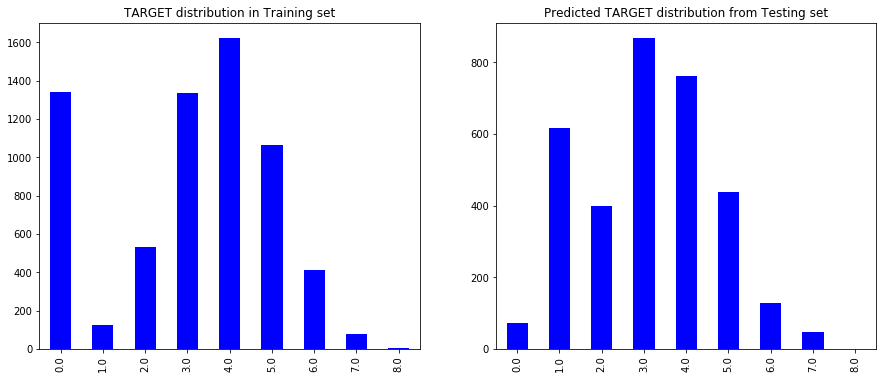

In [65]:
new_pred=round(zip_results.predict(x_test,exog_infl=x_test))


#define figure with TARGET distribution in Train set, and predicted TARGET distribution from Test set 
plt.figure(figsize=(15,6))
#TARGET distribution in Train set
plt.subplot(1,2,1)
plt.title('TARGET distribution in Training set')
absolute_output_df['TARGET'].value_counts().sort_index().plot(kind='bar', color='blue');
#predicted TARGET distribution from Test set
plt.subplot(1,2,2)
plt.title('Predicted TARGET distribution from Testing set')
new_pred.value_counts().sort_index().plot(kind='bar', color='blue');



As we can see from the plot we have observations estimated at 0 which was expected and desired. We also have a lot of 3 and 4 as we expected from the target distribution in the train set.

## Conclusions

We constructed 7 different model to estimate the TARGET variable which reflects the number of wine cases ordered:
- 2 Multiple linear regression
- 2 Poisson regression
- 2 Negative Binomial regression
- 1 Zero Inflated Poisson regression

Between the models, only the 2 Poisson and the Zero Inflated Poisson meet the requirements to have robust results.
Since our target variable is a count variable the Multiple Linear Regression models are not appropriate to fit this kind of target. 
The Negative Binomial Regression has to meet the requirement that the difference between the variance and the mean value is greater than zero and statistically significant. This was not the case for either of our Negative Binomial Regression models.
Considering the presence of 0 in our target and the results of the dispersion test we decided to build a Zero Inflated Poisson model. This model has the lowest RMSE value and the highest Log-Likelihood.
We therefore selected this last model as the best model to use to estimate this target.


When we fit the test data to this model we saw predicted values ranging from 0 to 8 which is the same range of values present in our training data. We also note that our model generated a large number of estimates between 3 and 4 which is again in line with the training data. Since we don't have actual values for the test dataset we cannot know how accurate our predictions were, however since our predictions are valid values, we are reasonably comfortable that our results are valid.